## 필요한 패키지 import 하기

In [1]:
import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import dlib 


# 왕관
## 기본 설정

In [28]:
# 스티커 이미지와 얼굴 이미지를 불러옵니다.
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'  # 사용자가 업로드한 이미지 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 투명한 배경을 유지하기 위해 IMREAD_UNCHANGED 사용
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2RGBA)  # RGBA 형식으로 변환

# 얼굴 랜드마크 탐지기 설정
detector_hog = dlib.get_frontal_face_detector()
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 얼굴 이미지 불러오기
img_bgr = cv2.imread('images/my_images.png')  # 본인 얼굴 이미지 경로
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


## 왕관 코드

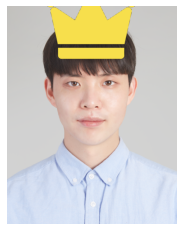

In [29]:
dlib_rects = detector_hog(img_rgb, 1)

# 랜드마크 추출 및 스티커 적용
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  # 얼굴 랜드마크 탐지
    landmarks = [(p.x, p.y) for p in points.parts()]  # 랜드마크 좌표 추출

    # 코의 중심 좌표 (30번 랜드마크)
    nose_point = landmarks[30]

    # 얼굴의 폭을 기준으로 스티커 크기를 조정합니다.
    face_width = dlib_rect.width()  # 얼굴의 폭 계산
    scale_factor = face_width / sticker_w  # 얼굴 폭에 맞춰 스티커 크기 비율 조정
    resized_sticker = cv2.resize(img_sticker, (int(sticker_w * scale_factor), int(sticker_h * scale_factor)))

    # 스티커를 적용할 위치 계산 (코 중심에서 스티커 크기만큼 위로 이동)
    x = nose_point[0] - resized_sticker.shape[1] // 2
    y = nose_point[1] - resized_sticker.shape[0]  # 스티커 크기만큼 위로 이동

    # 추가적으로 얼굴 전체 높이의 절반만큼 더 올림
    y = y - (dlib_rect.height() // 2)

    # 스티커가 이미지 밖으로 나가는 경우 조정
    if x < 0:
        resized_sticker = resized_sticker[:, -x:]  # 왼쪽으로 나가는 부분 처리
        x = 0
    if y < 0:
        resized_sticker = resized_sticker[-y:, :]  # 위쪽으로 나가는 부분 처리
        y = 0

    # 스티커 이미지의 투명 채널을 고려한 이미지 합성
    for i in range(resized_sticker.shape[0]):
        for j in range(resized_sticker.shape[1]):
            if resized_sticker[i, j, 3] != 0:  # 투명하지 않은 부분만 적용
                if 0 <= y + i < img_rgb.shape[0] and 0 <= x + j < img_rgb.shape[1]:  # 이미지 범위 안에 있는지 확인
                    img_rgb[y + i, x + j] = resized_sticker[i, j, :3]  # 스티커의 RGB 값 복사

# 결과 출력
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

## 고양이 수염

In [4]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'  # 사용자가 업로드한 이미지 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 투명한 배경을 유지하기 위해 IMREAD_UNCHANGED 사용
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2RGBA)  # RGBA 형식으로 변환

# 얼굴 랜드마크 탐지기 설정
detector_hog = dlib.get_frontal_face_detector()
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 얼굴 이미지 불러오기
img_bgr = cv2.imread('images/my_images.png')  # 본인 얼굴 이미지 경로
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


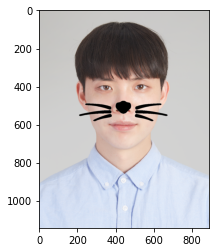

In [5]:
# 얼굴 탐지
dlib_rects = detector_hog(img_rgb, 1)

# 랜드마크 추출
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    landmarks = [(p.x, p.y) for p in points.parts()]

    # 코의 중심 좌표 (33번 랜드마크)
    nose_point = landmarks[33]

    # 스티커 크기를 조정합니다.
    sticker_h, sticker_w = img_sticker.shape[:2]
    face_width = dlib_rect.width()  # 얼굴의 폭
    scale_factor = face_width / sticker_w  # 얼굴 크기에 맞춰 스티커 크기 조정
    resized_sticker = cv2.resize(img_sticker, (int(sticker_w * scale_factor), int(sticker_h * scale_factor)))

    # 스티커를 적용할 위치 계산 (코 중심으로 정렬)
    x = nose_point[0] - resized_sticker.shape[1] // 2
    y = nose_point[1] - resized_sticker.shape[0] // 2 - 20

    # 스티커 적용 (투명 부분은 무시하고 합성)
    for i in range(resized_sticker.shape[0]):
        for j in range(resized_sticker.shape[1]):
            if resized_sticker[i, j, 3] != 0:  # 투명하지 않은 부분만 적용
                img_rgb[y + i, x + j] = resized_sticker[i, j, :3]  # RGB 값 복사

# 결과 출력
plt.imshow(img_rgb)
plt.show()

코 위치는 30번대신 33번으로 했는데, 이때 뭔가 너무 어색한거같아서 노가다를 통해 적절한 위치를 찾고있음

이건 사람마다 좀 차이가 존재하기도 하고, 그루들과 나눔할때 적정한 위치가 다른것을 확인함

## 테스트 1
만약 얼굴의 각도가 정각도가 아닌?

회전하면 어떻게 되는가?

그러면 스티커의 이미지도 얼굴의 각도에 따라 회전시켲

In [25]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'  # 사용자가 업로드한 이미지 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 투명한 배경을 유지하기 위해 IMREAD_UNCHANGED 사용
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2RGBA)  # RGBA 형식으로 변환

# 얼굴 랜드마크 탐지기 설정
detector_hog = dlib.get_frontal_face_detector()
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 얼굴 이미지 불러오기
img_bgr = cv2.imread('images/test2.png')  # 본인 얼굴 이미지 경로
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


In [26]:
# 얼굴 랜드마크 표시
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  # 얼굴 랜드마크 탐지
    landmarks = [(p.x, p.y) for p in points.parts()]  # 랜드마크 좌표 추출

    # 랜드마크를 이미지에 표시
    for point in landmarks:
        cv2.circle(img_rgb, point, 3, (0, 255, 0), -1)



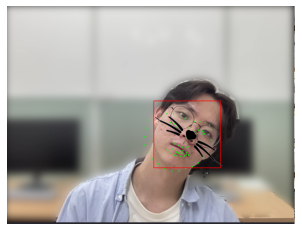

In [27]:
# 얼굴 탐지
dlib_rects = detector_hog(img_rgb, 1)

# 얼굴 객체 인식 박스와 랜드마크 표시
for dlib_rect in dlib_rects:
    # 얼굴 인식 박스 그리기
    l, t, r, b = dlib_rect.left(), dlib_rect.top(), dlib_rect.right(), dlib_rect.bottom()
    cv2.rectangle(img_rgb, (l, t), (r, b), (255, 0, 0), 2)  # 얼굴 객체 인식 박스 (파란색)

    # 랜드마크 추출
    points = landmark_predictor(img_rgb, dlib_rect)
    landmarks = [(p.x, p.y) for p in points.parts()]

# 얼굴 각도 계산 및 수염 적용
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    landmarks = [(p.x, p.y) for p in points.parts()]

    # 눈 사이의 기울기 (36번과 45번 랜드마크를 이용하여 얼굴 기울기를 계산)
    left_eye = landmarks[36]
    right_eye = landmarks[45]
    delta_x = right_eye[0] - left_eye[0]
    delta_y = right_eye[1] - left_eye[1]
    angle = -np.degrees(np.arctan2(delta_y, delta_x))  # 각도 계산, 반대로 회전하도록 조정

    # 수염 이미지 회전
    (sticker_h, sticker_w) = img_sticker.shape[:2]
    center = (sticker_w // 2, sticker_h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)  # 각도에 맞춰 회전
    rotated_sticker = cv2.warpAffine(img_sticker, rotation_matrix, (sticker_w, sticker_h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

    # 코 중심을 기반으로 수염 위치를 조정 (코의 중심은 30번 랜드마크)
    nose_point = landmarks[30]  # 코의 중심 (30번 랜드마크)

    # 스티커 크기 조정
    face_width = dlib_rect.width()
    scale_factor = face_width / sticker_w  # 얼굴의 폭에 맞춰 스티커 크기 비율 조정
    resized_sticker = cv2.resize(rotated_sticker, (int(sticker_w * scale_factor), int(sticker_h * scale_factor)))

    # 스티커를 적용할 위치 계산 (코 아래에 수염을 배치하되 수염의 중심을 고려)
    x = nose_point[0] - resized_sticker.shape[1] // 2 - 10
    y = nose_point[1] - resized_sticker.shape[1] // 2 +10 # 코 중심에서 조금 아래로 (수염 위치를 더 조정)

    # 스티커가 이미지 밖으로 나가는 경우 처리
    if x < 0:
        resized_sticker = resized_sticker[:, -x:]
        x = 0
    if y + resized_sticker.shape[0] > img_rgb.shape[0]:
        resized_sticker = resized_sticker[:img_rgb.shape[0] - y, :]

    # 스티커 이미지의 투명 채널을 고려한 합성
    for i in range(resized_sticker.shape[0]):
        for j in range(resized_sticker.shape[1]):
            if resized_sticker[i, j, 3] != 0:  # 투명하지 않은 부분만 적용
                if 0 <= y + i < img_rgb.shape[0] and 0 <= x + j < img_rgb.shape[1]:  # 이미지 범위 안에 있는지 확인
                    img_rgb[y + i, x + j] = resized_sticker[i, j, :3]  # 스티커의 RGB 값 복사

# 결과 출력 (랜드마크 표시 및 수염 적용된 이미지)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# 파이썬스러운 코드로 변환!

In [31]:
# 스티커 이미지와 얼굴 랜드마크 모델을 로드하는 함수
def load_resources(sticker_image_path, model_path):
    # 스티커 이미지 로드 및 변환
    img_sticker = cv2.imread(sticker_image_path, cv2.IMREAD_UNCHANGED)
    img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2RGBA)  # RGBA 형식으로 변환

    # 얼굴 랜드마크 탐지기 설정
    detector_hog = dlib.get_frontal_face_detector()
    landmark_predictor = dlib.shape_predictor(model_path)
    
    return img_sticker, detector_hog, landmark_predictor


In [32]:
# 스티커를 얼굴에 적용하는 메인 함수
def apply_sticker_to_face(face_image_path, sticker_image_path, model_path='models/shape_predictor_68_face_landmarks.dat'):
    # 리소스 로드
    img_sticker, detector_hog, landmark_predictor = load_resources(sticker_image_path, model_path)

    # 얼굴 이미지 로드
    img_bgr = cv2.imread(face_image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # 얼굴 탐지 및 랜드마크 추출
    dlib_rects = detector_hog(img_rgb, 1)  # 얼굴 탐지

    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        landmarks = [(p.x, p.y) for p in points.parts()]
        nose_point = landmarks[30]  # 코의 중심 좌표 (30번 랜드마크)

        # 얼굴의 폭을 기준으로 스티커 크기를 조정
        face_width = dlib_rect.width()
        sticker_h, sticker_w = img_sticker.shape[:2]
        scale_factor = face_width / sticker_w
        resized_sticker = cv2.resize(img_sticker, (int(sticker_w * scale_factor), int(sticker_h * scale_factor)))

        # 스티커 위치 계산 (코 중심을 기준으로 스티커 배치)
        x = nose_point[0] - resized_sticker.shape[1] // 2
        y = nose_point[1] - resized_sticker.shape[0]  # 코 아래로 이동
        y = y - (dlib_rect.height() // 2)  # 얼굴 높이의 절반만큼 더 올림

        # 스티커가 이미지 밖으로 나가는 경우 조정
        if x < 0:
            resized_sticker = resized_sticker[:, -x:]
            x = 0
        if y < 0:
            resized_sticker = resized_sticker[-y:, :]
            y = 0

        # 스티커를 얼굴 이미지에 적용 (투명한 부분을 고려한 합성)
        for i in range(resized_sticker.shape[0]):
            for j in range(resized_sticker.shape[1]):
                if resized_sticker[i, j, 3] != 0:  # 투명하지 않은 부분만 적용
                    if 0 <= y + i < img_rgb.shape[0] and 0 <= x + j < img_rgb.shape[1]:
                        img_rgb[y + i, x + j] = resized_sticker[i, j, :3]  # RGB 값 복사

    # 결과 출력
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

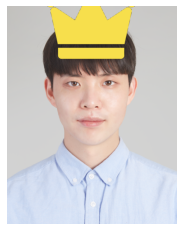

In [33]:
# 함수 사용 예시
apply_sticker_to_face('images/my_images.png', os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png')

## 회고

오늘 외출로 인해 15시부터 프로젝트를 진행했는데,
   
아쉬운거 같다. 시간적 여유가 있다면, 여러방면으로 실험할 수 있었을 거 같다.

그래도 오늘의 유의미한 성과는 눈의 각도로 얼굴의 회전정도를 파악해서 스티커도 그만큼 회전시키면 된다는 걸 알았다.